https://sergworks.wordpress.com/2016/10/26/chsh-game-in-detail/

https://github.com/qiskit-community/qiskit-community-tutorials/blob/master/awards/teach_me_qiskit_2018/chsh_game/CHSH%20game-tutorial.ipynb

In [ ]:
# pip install cirq --quiet

In [1]:
import cirq
import numpy as np
from cirq.contrib.svg import SVGCircuit as draw
from cirq.circuits import InsertStrategy
import matplotlib.pyplot as plt

In [2]:
#we need 4 qubits
#1 Alice
#2 bit->Alice
#3 Bob
#4 bit->Bob

q=[cirq.LineQubit(i) for i in range(4)]
c=cirq.Circuit()

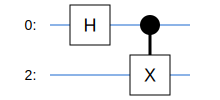

In [3]:
c.append(cirq.H(q[0]))
c.append(cirq.CNOT(q[0],q[2]))
draw(c)

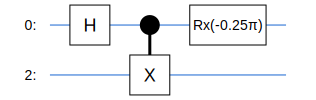

In [4]:
# c.append(cirq.rx(np.pi).on(q[0]))
c.append(cirq.rx(-np.pi/4).on(q[0]))
# c.append(cirq.X(q[0])**(-0.25))
draw(c)

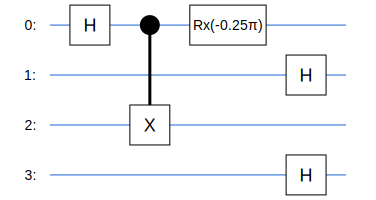

In [5]:
c.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)
c.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)
draw(c)

In [6]:
# c.append(cirq.CNOT(q[1],q[0])**(0.5))
# c.append(cirq.CNOT(q[3],q[2])**(0.5))
# c.append(cirq.Y(q[0]).controlled_by(q[1])**(0.5))
# c.append(cirq.Y(q[2]).controlled_by(q[3])**(0.5))
c.append(cirq.rx(np.pi/2).on(q[0]).controlled_by(q[1]))
c.append(cirq.rx(np.pi/2).on(q[2]).controlled_by(q[3]))
# draw(c)

0.33|0000⟩ + 0.33|0001⟩ + 0.14j|0010⟩ - 0.14j|0011⟩ + 0.33|0100⟩ + 0.14|0101⟩ - 0.14j|0110⟩ - 0.33j|0111⟩ + 0.14j|1000⟩ - 0.14j|1001⟩ + 0.33|1010⟩ + 0.33|1011⟩ - 0.14j|1100⟩ - 0.33j|1101⟩ + 0.33|1110⟩ + 0.14|1111⟩


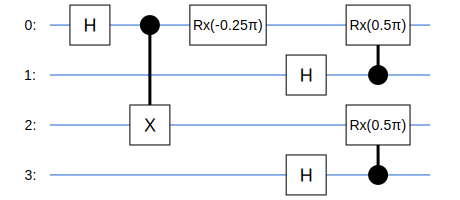

In [7]:
s=cirq.Simulator()
result=s.simulate(c,qubit_order=[q[0],q[1],q[2],q[3]])
print(result.dirac_notation())
draw(c)

In [8]:
.92**2+.38**2

0.9908

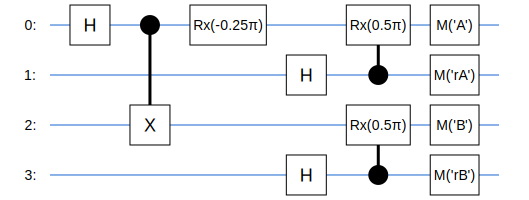

In [9]:
c.append(cirq.measure(q[0],key='A'))
c.append(cirq.measure(q[1],key='rA'))
c.append(cirq.measure(q[2],key='B'))
c.append(cirq.measure(q[3],key='rB'))
draw(c)

In [10]:
sim = cirq.Simulator()
result = sim.run(c, repetitions=2000)

In [11]:
A = result.measurements['A'][:, 0]
r_A = result.measurements['rA'][:, 0]
B = result.measurements['B'][:, 0]
r_B = result.measurements['rB'][:, 0]

In [12]:
(np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))

array([ True,  True, False, ...,  True,  True,  True])

In [13]:
win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))

In [14]:
np.mean(win)

0.8745

In [15]:
lw=[]
a=[]
for th in np.arange(0,2*np.pi,np.pi/8):
    q=[cirq.LineQubit(i) for i in range(4)]
    c=cirq.Circuit()
    c.append(cirq.H(q[0]))
    c.append(cirq.CNOT(q[0],q[2]))
    # c.append(cirq.X(q[0])**(-0.25))
    c.append(cirq.rx(th).on(q[0]))
    c.append(cirq.H(q[1]),strategy=InsertStrategy.NEW_THEN_INLINE)
    c.append(cirq.H(q[3]),strategy=InsertStrategy.INLINE)
    c.append(cirq.X(q[0]).controlled_by(q[1])**(0.5))
    c.append(cirq.X(q[2]).controlled_by(q[3])**(0.5))
    # c.append(cirq.CNOT(q[3],q[2])**(0.5))
    c.append(cirq.measure(q[0],key='A'))
    c.append(cirq.measure(q[1],key='rA'))
    c.append(cirq.measure(q[2],key='B'))
    c.append(cirq.measure(q[3],key='rB'))
# draw(c)
    sim = cirq.Simulator()
    result = sim.run(c, repetitions=2000)
    A = result.measurements['A'][:, 0]
    r_A = result.measurements['rA'][:, 0]
    B = result.measurements['B'][:, 0]
    r_B = result.measurements['rB'][:, 0]
    (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
    win= (np.array(A)+np.array(B))%2 ==(np.array(r_A) & np.array(r_B))
    lw.append(np.mean(win))
    a.append(th)
# draw(c)

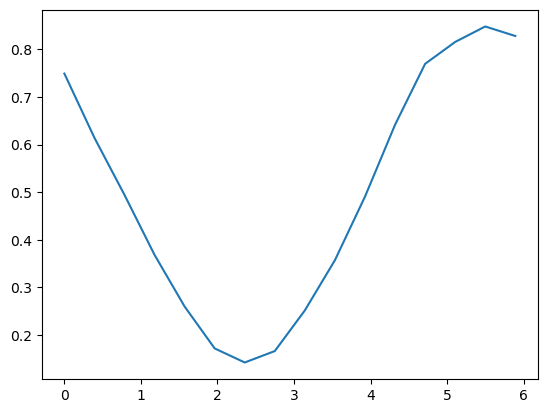

In [16]:
plt.plot(a,lw)

In [136]:
np.argmax(lw)

14

In [138]:
a[14]

5.497787143782138